In [105]:

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [107]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [108]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

5

In [109]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=473cca902aff3a88f36cec7c4672a616


In [110]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [111]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":58.69,"feels_like":58.53,"temp_min":56.34,"temp_max":60.76,"pressure":1020,"humidity":91},"visibility":10000,"wind":{"speed":3,"deg":160,"gust":11.99},"clouds":{"all":100},"dt":1633370580,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1633344282,"sunset":1633386049},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [112]:
# Get the JSON data.
boston_data = city_weather.json()


In [113]:

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 60.76 91 100 3


In [114]:

# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-10-04 18:03:00'

In [117]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [118]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [119]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [120]:

#Empty city_data list
city_data = []
print("Beginning Data Retrieval")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | caravelas
Processing Record 4 of Set 1 | broken hill
Processing Record 5 of Set 1 | rawson
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | stephenville
Processing Record 9 of Set 1 | lavrentiya
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | mendi
Processing Record 13 of Set 1 | marsala
Processing Record 14 of Set 1 | jalingo
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | dingle
Processing Record 19 of Set 1 | korla
Processing Record 20 of Set 1 | karratha
Processing Record 21 of Set 1 | poum
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | kedzierzyn-kozle
Processi

Processing Record 37 of Set 4 | toora-khem
Processing Record 38 of Set 4 | guiyang
Processing Record 39 of Set 4 | norman wells
Processing Record 40 of Set 4 | aitape
Processing Record 41 of Set 4 | chagda
City not found. Skipping...
Processing Record 42 of Set 4 | meulaboh
Processing Record 43 of Set 4 | tidore
City not found. Skipping...
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | imbituba
Processing Record 46 of Set 4 | yellowknife
Processing Record 47 of Set 4 | tual
Processing Record 48 of Set 4 | balikpapan
Processing Record 49 of Set 4 | yar-sale
Processing Record 50 of Set 4 | aras
Processing Record 1 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 2 of Set 5 | yeletskiy
City not found. Skipping...
Processing Record 3 of Set 5 | igrim
Processing Record 4 of Set 5 | varhaug
Processing Record 5 of Set 5 | tymovskoye
Processing Record 6 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 5 | luderitz
P

Processing Record 24 of Set 8 | awbari
Processing Record 25 of Set 8 | ahuimanu
Processing Record 26 of Set 8 | havoysund
Processing Record 27 of Set 8 | dombas
Processing Record 28 of Set 8 | hattiesburg
Processing Record 29 of Set 8 | kloulklubed
Processing Record 30 of Set 8 | bengkulu
Processing Record 31 of Set 8 | lompoc
Processing Record 32 of Set 8 | nagato
Processing Record 33 of Set 8 | sars
Processing Record 34 of Set 8 | talara
Processing Record 35 of Set 8 | huadian
Processing Record 36 of Set 8 | sinnamary
Processing Record 37 of Set 8 | broome
Processing Record 38 of Set 8 | araioses
Processing Record 39 of Set 8 | daru
Processing Record 40 of Set 8 | husavik
Processing Record 41 of Set 8 | grindavik
Processing Record 42 of Set 8 | toliary
City not found. Skipping...
Processing Record 43 of Set 8 | tashigang
Processing Record 44 of Set 8 | cap malheureux
Processing Record 45 of Set 8 | robore
Processing Record 46 of Set 8 | aakirkeby
City not found. Skipping...
Processin

Processing Record 13 of Set 12 | varska
City not found. Skipping...
Processing Record 14 of Set 12 | mut
Processing Record 15 of Set 12 | bonthe
Processing Record 16 of Set 12 | russkaya polyana
Processing Record 17 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 18 of Set 12 | tromso
Processing Record 19 of Set 12 | manono
Processing Record 20 of Set 12 | najran
Processing Record 21 of Set 12 | mount darwin
Processing Record 22 of Set 12 | rabo de peixe
Processing Record 23 of Set 12 | nuevo progreso
Processing Record 24 of Set 12 | isla aguada
Processing Record 25 of Set 12 | constantine
Processing Record 26 of Set 12 | tarudant
City not found. Skipping...
Processing Record 27 of Set 12 | graciano sanchez
Processing Record 28 of Set 12 | trat
Processing Record 29 of Set 12 | tornio
Processing Record 30 of Set 12 | qaqortoq
Processing Record 31 of Set 12 | mokhsogollokh
Processing Record 32 of Set 12 | teguise
Processing Record 33 of Set 12 | lianran
Proc

In [122]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pisco,PE,2021-10-04 18:13:15,-13.7000,-76.2167,67.01,68,0,12.66
1,Busselton,AU,2021-10-04 18:13:15,-33.6500,115.3333,48.09,71,99,9.95
2,Caravelas,BR,2021-10-04 18:13:15,-17.7125,-39.2481,82.08,62,7,13.31
3,Broken Hill,AU,2021-10-04 18:13:16,-31.9500,141.4333,48.13,82,0,11.34
4,Rawson,AR,2021-10-04 18:13:16,-43.3002,-65.1023,60.69,33,4,3.80
5,Kodiak,US,2021-10-04 18:13:16,57.7900,-152.4072,35.11,75,1,6.91
6,Kavaratti,IN,2021-10-04 18:13:17,10.5669,72.6420,82.09,81,81,8.79
7,Stephenville,US,2021-10-04 18:13:17,32.2207,-98.2023,84.94,40,1,10.36
8,Lavrentiya,RU,2021-10-04 18:13:17,65.5833,-171.0000,34.02,98,100,22.70
9,Albany,US,2021-10-04 18:12:15,42.6001,-73.9662,60.80,95,100,1.01


In [124]:
# Create the output file (CSV).
output_data_file = "Resources/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [125]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

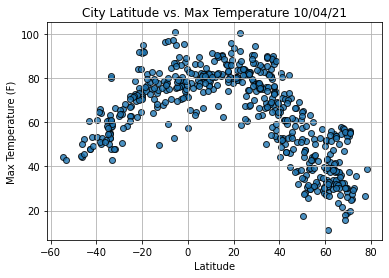

In [126]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Resources/Fig1.png")

# Show plot.
plt.show()

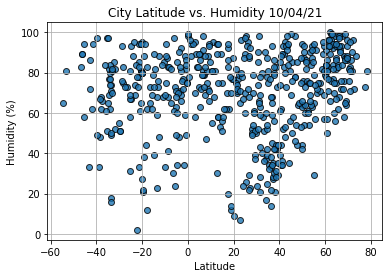

In [128]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig2.png")
# Show plot.
plt.show()

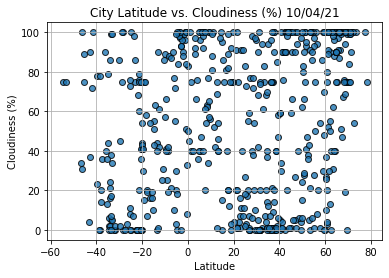

In [129]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resources/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Resour/Fig4.png")
# Show plot.
plt.show()